In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Plan

# Data Import : 

In [49]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


Data import

In [50]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

Set new index, and delete the old one.

In [51]:
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)


X_train_estimated_a.drop('date_calc', axis=1, inplace=True)
X_test_estimated_a.drop('date_calc', axis=1, inplace=True)

X_train_estimated_b.drop('date_calc', axis=1, inplace=True)
X_test_estimated_b.drop('date_calc', axis=1, inplace=True)

X_train_estimated_c.drop('date_calc', axis=1, inplace=True)
X_test_estimated_c.drop('date_calc', axis=1, inplace=True)


train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

Make sure that we have the same time-step for X and y: by hour.

In [52]:
feature_idx = ['dew_or_rime:idx','is_day:idx','is_in_shadow:idx','precip_type_5min:idx','snow_drift:idx']
for feature in feature_idx:
    X_train_observed_a[feature] = X_train_observed_a[feature].resample('H').mean().round()
    X_train_observed_b[feature] = X_train_observed_b[feature].resample('H').mean().round()
    X_train_observed_c[feature] = X_train_observed_c[feature].resample('H').mean().round()

    X_train_estimated_a[feature] = X_train_estimated_a[feature].resample('H').mean().round()
    X_train_estimated_b[feature] = X_train_estimated_b[feature].resample('H').mean().round()
    X_train_estimated_c[feature] = X_train_estimated_c[feature].resample('H').mean().round()

    X_test_estimated_a[feature] = X_test_estimated_a[feature].resample('H').mean().round()
    X_test_estimated_b[feature] = X_test_estimated_b[feature].resample('H').mean().round()
    X_test_estimated_c[feature] = X_test_estimated_c[feature].resample('H').mean().round()

In [53]:
features_no_idx = X_train_observed_a.columns[X_train_observed_a.columns.isin(feature_idx)==False].tolist()
for feature in features_no_idx:
    X_train_observed_a[feature] = X_train_observed_a[feature].resample('H').mean()
    X_train_observed_b[feature] = X_train_observed_b[feature].resample('H').mean()
    X_train_observed_c[feature] = X_train_observed_c[feature].resample('H').mean()

    X_train_estimated_a[feature] = X_train_estimated_a[feature].resample('H').mean()
    X_train_estimated_b[feature] = X_train_estimated_b[feature].resample('H').mean()
    X_train_estimated_c[feature] = X_train_estimated_c[feature].resample('H').mean()

    X_test_estimated_a[feature] = X_test_estimated_a[feature].resample('H').mean()
    X_test_estimated_b[feature] = X_test_estimated_b[feature].resample('H').mean()
    X_test_estimated_c[feature] = X_test_estimated_c[feature].resample('H').mean()

In [54]:
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

Match the size of X and Y. We create X_train_estimated_S_matched, X_train_observed_S_matched, train_S_estimated_matched, train_S_observed_matched

In [55]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

Remove outlier from B.

In [56]:
B19 = train_b.loc['2019-6-1':'2019-6-2'].index

b20_1 = train_b.loc['2020-4-2':'2020-4-15'].index
b20_2 = train_b.loc['2020-7-13':'2020-8-25'].index
B20 = b20_1.union(b20_2)

b21_1 = train_b.loc['2021-2-18':'2021-4-18'].index
b21_2 = train_b.loc['2021-4-30':'2021-5-1'].index
b21_3 = train_b.loc['2021-6-5':'2021-6-6'].index
b21_4 = train_b.loc['2021-6-13':'2021-6-13'].index
b21_5 = train_b.loc['2021-6-23':'2021-6-23'].index
b21_6 = train_b.loc['2021-7-4':'2021-7-5'].index
b21_7 = train_b.loc['2021-8-26':'2021-9-3'].index
b21_8 = train_b.loc['2021-9-10':'2021-9-13'].index
b21_9 = train_b.loc['2021-9-21':'2021-9-26'].index
B21 = b21_1.union(b21_2).union(b21_3).union(b21_4).union(b21_5).union(b21_6).union(b21_7).union(b21_8).union(b21_9)

B22 = train_b.loc['2022-3-20':'2022-4-4'].index

B_index_drop = B19.union(B20).union(B21).union(B22)

In [57]:
train_b = train_b[train_b.index.isin(B_index_drop)==False]

In [58]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
new_index_b = train_b.index

intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)

X_train_estimated_b = X_train_estimated_b.loc[new_index_b.intersection(X_train_estimated_b.index)]
X_train_observed_b = X_train_observed_b.loc[new_index_b.intersection(X_train_observed_b.index)]

train_b_estimated = train_b.loc[X_train_estimated_b.index]
train_b_observed = train_b.loc[X_train_observed_b.index]

# 1. Delete feature:
- high correlated value
- constant values
- delete low importance feature with PCA ?

## high correlated value

In [59]:
corr_matrix = X_train_observed_a.corr().abs()
high_corr_var=np.where(corr_matrix>0.95)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('absolute_humidity_2m:gm3', 'dew_point_2m:K'),
 ('clear_sky_energy_1h:J', 'clear_sky_rad:W'),
 ('diffuse_rad:W', 'diffuse_rad_1h:J'),
 ('direct_rad:W', 'direct_rad_1h:J'),
 ('is_day:idx', 'is_in_shadow:idx'),
 ('msl_pressure:hPa', 'pressure_100m:hPa'),
 ('msl_pressure:hPa', 'pressure_50m:hPa'),
 ('msl_pressure:hPa', 'sfc_pressure:hPa'),
 ('pressure_100m:hPa', 'pressure_50m:hPa'),
 ('pressure_100m:hPa', 'sfc_pressure:hPa'),
 ('pressure_50m:hPa', 'sfc_pressure:hPa')]

In [60]:
to_drop = ['absolute_humidity_2m:gm3', 'clear_sky_energy_1h:J', 'diffuse_rad_1h:J', 
           'direct_rad_1h:J', 'total_cloud_cover:p', 
           'pressure_100m:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa']

In [61]:
#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(to_drop, axis=1, inplace=True)
X_train_estimated_b.drop(to_drop, axis=1, inplace=True)
X_train_estimated_c.drop(to_drop, axis=1, inplace=True)

X_train_observed_a.drop(to_drop, axis=1, inplace=True)
X_train_observed_b.drop(to_drop, axis=1, inplace=True)
X_train_observed_c.drop(to_drop, axis=1, inplace=True)
    
X_test_estimated_a.drop(to_drop, axis=1, inplace=True)
X_test_estimated_b.drop(to_drop, axis=1, inplace=True)
X_test_estimated_c.drop(to_drop, axis=1, inplace=True)

In [62]:
X_train_estimated_a.shape[1]

37

## constant values

Drop features that are constant for each station.

In [63]:
constant_values_a = ['snow_drift:idx', 'snow_density:kgm3', 'elevation:m']
constant_values_b = ['snow_density:kgm3', 'elevation:m']
constant_values_c = ['snow_density:kgm3', 'elevation:m']

In [64]:
#Delete because constant values:
X_train_estimated_a.drop(constant_values_a, axis=1, inplace=True)
X_train_observed_a.drop(constant_values_a, axis=1, inplace=True)
X_test_estimated_a.drop(constant_values_a, axis=1, inplace=True)

X_train_estimated_b.drop(constant_values_b, axis=1, inplace=True)
X_train_observed_b.drop(constant_values_b, axis=1, inplace=True)
X_test_estimated_b.drop(constant_values_b, axis=1, inplace=True)
    
X_train_estimated_c.drop(constant_values_c, axis=1, inplace=True)
X_train_observed_c.drop(constant_values_c, axis=1, inplace=True)
X_test_estimated_c.drop(constant_values_c, axis=1, inplace=True)

# 2. Feature Engineering:
- Create new features (time related, Fourier ?)
- Feature = stationary + seasonality + noise

In [66]:
# and more 

In [67]:
#We change the Time that is a string, to a variable in seconds 
timestamp_s_observed_a = X_train_observed_a.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c.index.map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c.index.map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c.index.map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


(<Axes: >,)

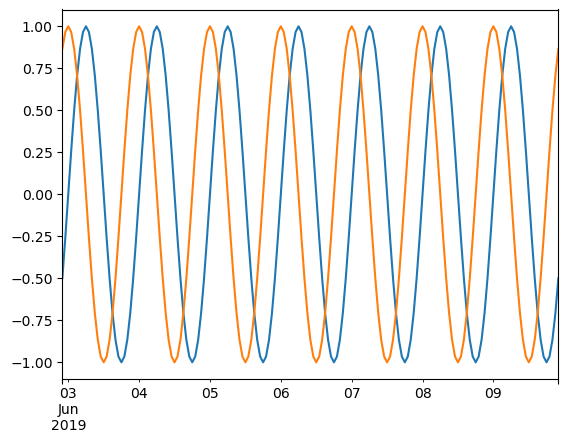

In [68]:
X_train_observed_a['Day sin'].loc['2019-06-02 22:00:00':'2019-06-09 22:00:00'].plot(),
X_train_observed_a['Day cos'].loc['2019-06-02 22:00:00':'2019-06-09 22:00:00'].plot(),

(<Axes: >,)

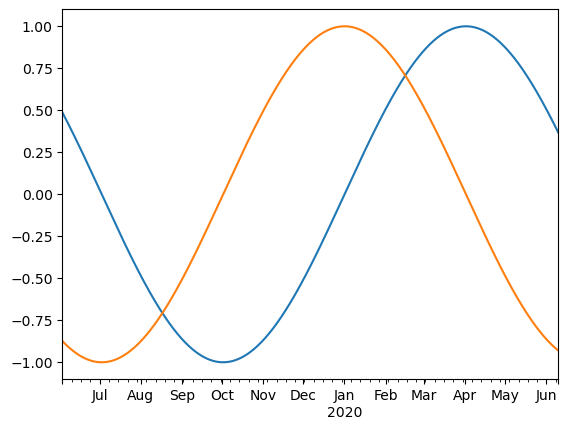

In [69]:
X_train_observed_a['Year sin'].loc['2019-06-02 22:00:00':'2020-06-09 22:00:00'].plot(),
X_train_observed_a['Year cos'].loc['2019-06-02 22:00:00':'2020-06-09 22:00:00'].plot(),

In [70]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

(<Axes: >,)

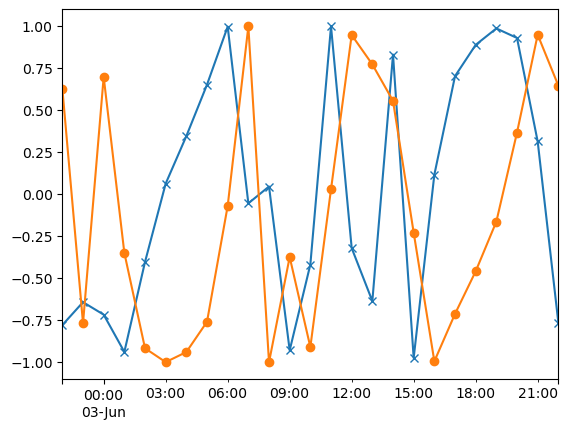

In [71]:
X_train_observed_a['sun_azimuth_cos:'].loc['2019-06-02 22:00:00':'2019-06-03 22:00:00'].plot(marker='x'),
X_train_observed_a['sun_azimuth_sin:'].loc['2019-06-02 22:00:00':'2019-06-03 22:00:00'].plot(marker='o'),

# 3. Missing Value:
- mean or KNN-Imputation

For the missing values, we fill with differents methods such as : 0, mean, KNN-Imputer.

## Mean

In [72]:
X_train_estimated_a.isna().mean().sort_values(ascending=False)[:3]*100

ceiling_height_agl:m    21.074192
cloud_base_agl:m        11.288120
wind_speed_10m:ms        0.000000
dtype: float64

In [73]:
#Missing values
value={'ceiling_height_agl:m' : X_train_estimated_a['ceiling_height_agl:m'].mean(),
       'cloud_base_agl:m' : -999#X_train_estimated_a['cloud_base_agl:m'].mean()
      }

X_train_estimated_a = X_train_estimated_a.fillna(value=value)
X_train_observed_a = X_train_observed_a.fillna(value=value)
X_test_estimated_a = X_test_estimated_a.fillna(value=value)

X_train_estimated_b = X_train_estimated_b.fillna(value=value)
X_train_observed_b = X_train_observed_b.fillna(value=value)
X_test_estimated_b = X_test_estimated_b.fillna(value=value)

X_train_estimated_c = X_train_estimated_c.fillna(value=value)
X_train_observed_c = X_train_observed_c.fillna(value=value)
X_test_estimated_c = X_test_estimated_c.fillna(value=value)

In [74]:
X_train_estimated_a.isna().mean().sort_values(ascending=False)[:3]*100

air_density_2m:kgm3    0.0
wind_speed_10m:ms      0.0
snow_depth:cm          0.0
dtype: float64

<Axes: >

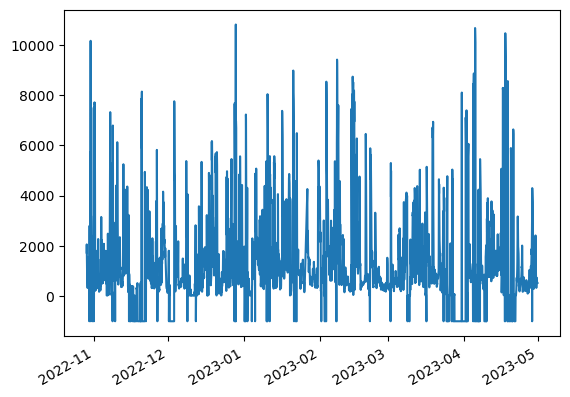

In [75]:
X_train_estimated_a['cloud_base_agl:m'].plot()

# 4. Data transformation:
- Feature: One-hot-encoding for idx and more
- Feature: Apply transformation Box Cox, (log, ^2, 1/,...)
- Y: Apply transformation too!
- Feature: Normalize (MinMax, StandardScaler, Robust)
- X_Estimated: Apply shift between estimated and observed

## one-hot-encoding

We apply _one-hot-encoder_, for categorials features. We saw that 'rain_water:kgm2' is also a categorial feature.

In [76]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx_a = ['dew_or_rime:idx', 'is_in_shadow:idx', 'precip_type_5min:idx', 'rain_water:kgm2']
idx_b_c = ['dew_or_rime:idx', 'is_in_shadow:idx', 'precip_type_5min:idx', 'snow_drift:idx', 'rain_water:kgm2']


for id in idx_a:
    concatenated_df = pd.concat([X_train_observed_a[id], X_train_estimated_a[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    
    X_train_observed_a = pd.concat([X_train_observed_a, df_observed_encoded], axis =1)
    X_train_estimated_a = pd.concat([X_train_estimated_a, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    
    X_train_observed_a.drop([id], inplace = True, axis=1)
    X_train_estimated_a.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx_b_c:
    concatenated_df = pd.concat([X_train_observed_b[id], X_train_estimated_b[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    
    X_train_observed_b = pd.concat([X_train_observed_b, df_observed_encoded], axis =1)
    X_train_estimated_b = pd.concat([X_train_estimated_b, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    
    X_train_observed_b.drop([id], inplace = True, axis=1)
    X_train_estimated_b.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx_b_c:
    concatenated_df = pd.concat([X_train_observed_c[id], X_train_estimated_c[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    
    X_train_observed_c = pd.concat([X_train_observed_c, df_observed_encoded], axis =1)
    X_train_estimated_c = pd.concat([X_train_estimated_c, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    
    X_train_observed_c.drop([id], inplace = True, axis=1)
    X_train_estimated_c.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)

In [77]:
X_train_observed_a.iloc[:,34:].head()

sun_azimuth_sin:  dew_or_rime:idx_-1.0  \
2019-06-02 22:00:00          0.628825                 False   
2019-06-02 23:00:00         -0.767264                 False   
2019-06-03 00:00:00          0.698439                 False   
2019-06-03 01:00:00         -0.348450                 False   
2019-06-03 02:00:00         -0.915519                 False   

                     dew_or_rime:idx_0.0  dew_or_rime:idx_1.0  \
2019-06-02 22:00:00                 True                False   
2019-06-02 23:00:00                 True                False   
2019-06-03 00:00:00                 True                False   
2019-06-03 01:00:00                 True                False   
2019-06-03 02:00:00                 True                False   

                     is_in_shadow:idx_0.0  is_in_shadow:idx_1.0  \
2019-06-02 22:00:00                 False                  True   
2019-06-02 23:00:00                 False                  True   
2019-06-03 00:00:00                 False                  True   
2019-06-03 01:00:00                 False                  True   
2019-06-03 02:00:00                  True                 False   

                     precip_type_5min:idx_0.0  precip_type_5min:idx_1.0  \
2019-06-02 22:00:00                      True                     False   
2019-06-02 23:00:00                      True                     False   
2019-06-03 00:00:00                      True                     False   
2019-06-03 01:00:00                      True                     False   
2019-06-03 02:00:00                      True                     False   

                     precip_type_5min:idx_2.0  precip_type_5min:idx_3.0  \
2019-06-02 22:00:00                     False                     False   
2019-06-02 23:00:00                     False                     False   
2019-06-03 00:00:00                     False                     False   
2019-06-03 01:00:00                     False                     False   
2019-06-03 02:00:00                     False                     False   

                     precip_type_5min:idx_4.0  rain_water:kgm2_0.0  \
2019-06-02 22:00:00                     False                 True   
2019-06-02 23:00:00                     False                False   
2019-06-03 00:00:00                     False                False   
2019-06-03 01:00:00                     False                False   
2019-06-03 02:00:00                     False                False   

                     rain_water:kgm2_0.02500000037252903  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                 True   
2019-06-03 00:00:00                                False   
2019-06-03 01:00:00                                False   
2019-06-03 02:00:00                                False   

                     rain_water:kgm2_0.05000000074505806  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                False   
2019-06-03 00:00:00                                False   
2019-06-03 01:00:00                                False   
2019-06-03 02:00:00                                False   

                     rain_water:kgm2_0.07500000298023224  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                False   
2019-06-03 00:00:00                                False   
2019-06-03 01:00:00                                False   
2019-06-03 02:00:00                                False   

                     rain_water:kgm2_0.10000000149011612  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                False   
2019-06-03 00:00:00                                 True   
2019-06-03 01:00:00                                False   
2019-06-03 02:00:00                                 True   

                     rain_water:kgm2_0.125  \
2019-06-02 22:00:00                

## Normalize (MinMax, StandardScaler, Robust)


In [78]:
col = []
for X in [X_train_estimated_a, X_train_observed_a, X_test_estimated_a,
         X_train_estimated_b, X_train_observed_b, X_test_estimated_b,
         X_train_estimated_c, X_train_observed_c, X_test_estimated_c]:
    col.append(X.columns)
    
id_ = []
for X in [X_train_estimated_a, X_train_observed_a, X_test_estimated_a,
         X_train_estimated_b, X_train_observed_b, X_test_estimated_b,
         X_train_estimated_c, X_train_observed_c, X_test_estimated_c]:
    id_.append(X.index)

In [79]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a = scaler.fit_transform(X_train_estimated_a)
X_train_observed_a = scaler.fit_transform(X_train_observed_a)
X_test_estimated_a = scaler.fit_transform(X_test_estimated_a)

X_train_estimated_b = scaler.fit_transform(X_train_estimated_b)
X_train_observed_b = scaler.fit_transform(X_train_observed_b)
X_test_estimated_b = scaler.fit_transform(X_test_estimated_b)

X_train_estimated_c = scaler.fit_transform(X_train_estimated_c)
X_train_observed_c = scaler.fit_transform(X_train_observed_c)
X_test_estimated_c = scaler.fit_transform(X_test_estimated_c)

In [80]:
X_train_estimated_a = pd.DataFrame(X_train_estimated_a, columns=col[0], index=id_[0])
X_train_observed_a = pd.DataFrame(X_train_observed_a, columns=col[1], index=id_[1])
X_test_estimated_a = pd.DataFrame(X_test_estimated_a, columns=col[2], index=id_[2])

X_train_estimated_b = pd.DataFrame(X_train_estimated_b, columns=col[3], index=id_[3])
X_train_observed_b = pd.DataFrame(X_train_observed_b, columns=col[4], index=id_[4])
X_test_estimated_b = pd.DataFrame(X_test_estimated_b, columns=col[5], index=id_[5])

X_train_estimated_c = pd.DataFrame(X_train_estimated_c, columns=col[6], index=id_[6])
X_train_observed_c = pd.DataFrame(X_train_observed_c, columns=col[7], index=id_[7])
X_test_estimated_c = pd.DataFrame(X_test_estimated_c, columns=col[8], index=id_[8])

In [81]:
X_train_estimated_a.max().sort_values(ascending=True)[:10]

rain_water:kgm2_1.100000023841858      0.0
rain_water:kgm2_0.22499999403953552    0.0
wind_speed_w_1000hPa:ms                0.0
rain_water:kgm2_0.32499998807907104    0.0
rain_water:kgm2_0.3499999940395355     0.0
rain_water:kgm2_1.0                    0.0
rain_water:kgm2_0.375                  0.0
rain_water:kgm2_0.42500001192092896    0.0
rain_water:kgm2_0.44999998807907104    0.0
rain_water:kgm2_0.45000001788139343    0.0
dtype: float64

In [82]:
X_test_estimated_a.index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-07-03 14:00:00', '2023-07-03 15:00:00',
               '2023-07-03 16:00:00', '2023-07-03 17:00:00',
               '2023-07-03 18:00:00', '2023-07-03 19:00:00',
               '2023-07-03 20:00:00', '2023-07-03 21:00:00',
               '2023-07-03 22:00:00', '2023-07-03 23:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=720, freq=None)

In [83]:
A_index19 = X_train_observed_a.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
A_index20 = X_train_observed_a.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
A_index21 = X_train_observed_a.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
A_index22 = X_train_observed_a.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

B_index19 = X_train_observed_b.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
B_index20 = X_train_observed_b.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
B_index21 = X_train_observed_b.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
#B_index22 = X_train_observed_b.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

#C_index19 = X_train_observed_c.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
C_index20 = X_train_observed_c.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
C_index21 = X_train_observed_c.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
#C_index22 = X_train_observed_c.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

In [86]:
A_index_spring = A_index20.union(A_index21).union(A_index22)
B_index_spring = B_index19.union(B_index20).union(B_index21)#.union(B_index22)
C_index_spring = C_index20.union(C_index21) #C_index19.union(C_index20).union(C_index21).union(C_index22)

In [87]:
X_train_observed_a_sping = X_train_observed_a.loc[A_index_spring]
X_train_observed_b_sping = X_train_observed_b.loc[B_index_spring]
X_train_observed_c_sping = X_train_observed_c.loc[C_index_spring]

<Axes: >

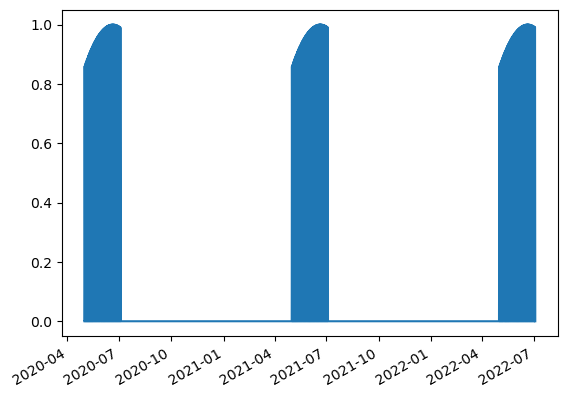

In [88]:
X_train_observed_a_sping.iloc[:,2].plot()

Same thing for X_train_estimated.

In [89]:
X_train_estimated_a.index

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 23:00:00',
               '2022-10-29 00:00:00', '2022-10-29 01:00:00',
               '2022-10-29 02:00:00', '2022-10-29 03:00:00',
               '2022-10-29 04:00:00', '2022-10-29 05:00:00',
               '2022-10-29 06:00:00', '2022-10-29 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[us]', length=4394, freq=None)

In [90]:
A_index19_est = X_train_observed_a.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
A_index20_est = X_train_observed_a.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
A_index21_est = X_train_observed_a.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

B_index19_est = X_train_observed_b.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
B_index20_est = X_train_observed_b.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
B_index21_est = X_train_observed_b.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

C_index19_est = X_train_observed_c.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
C_index20_est = X_train_observed_c.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
C_index21_est = X_train_observed_c.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

In [91]:
len(C_index19_est),len(C_index20_est), len(C_index21_est)

(4442, 4418, 4293)

In [92]:
A_index20_est

DatetimeIndex(['2020-10-28 22:00:00', '2020-10-28 23:00:00',
               '2020-10-29 00:00:00', '2020-10-29 01:00:00',
               '2020-10-29 02:00:00', '2020-10-29 03:00:00',
               '2020-10-29 04:00:00', '2020-10-29 05:00:00',
               '2020-10-29 06:00:00', '2020-10-29 07:00:00',
               ...
               '2021-04-30 14:00:00', '2021-04-30 15:00:00',
               '2021-04-30 16:00:00', '2021-04-30 17:00:00',
               '2021-04-30 18:00:00', '2021-04-30 19:00:00',
               '2021-04-30 20:00:00', '2021-04-30 21:00:00',
               '2021-04-30 22:00:00', '2021-04-30 23:00:00'],
              dtype='datetime64[us]', length=4418, freq=None)

In [93]:
A_index_est = A_index19_est.union(A_index20_est).union(A_index21_est)
B_index_est = B_index19_est.union(B_index20_est).union(B_index21_est)
C_index_est = C_index19_est.union(C_index20_est).union(C_index21_est)

In [94]:
X_train_observed_a_est = X_train_observed_a.loc[A_index_est]
X_train_observed_b_est = X_train_observed_b.loc[B_index_est]
X_train_observed_c_est = X_train_observed_c.loc[C_index_est]

<Axes: >

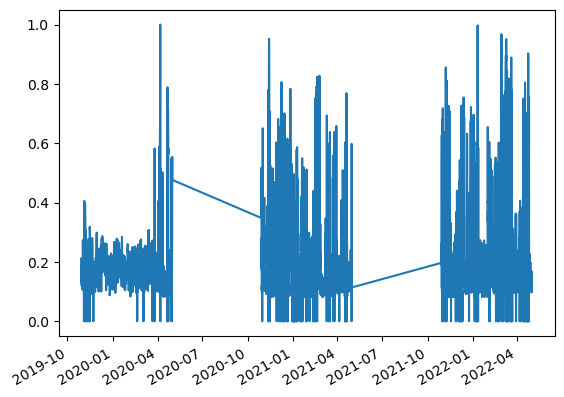

In [95]:
X_train_observed_a_est.iloc[:,3].plot()

# 5. ImBalance Data (too much zero to forecast)
- Build 2 models, one binary classification, and another one for y>0 prediction

We create train_S_estimated_binary, train_S_observed_binary which indicates if y>0 of not.

In [96]:
max_a = max(train_a_estimated['pv_measurement'])
train_a_estimated['pv_measurement'] = train_a_estimated['pv_measurement']/max_a

max_b = max(train_b_estimated['pv_measurement'])
train_b_estimated['pv_measurement'] = train_b_estimated['pv_measurement']/max_b

max_c = max(train_c_estimated['pv_measurement'])
train_c_estimated['pv_measurement'] = train_c_estimated['pv_measurement']/max_c

In [97]:
train_a_observed['pv_measurement'] = train_a_observed['pv_measurement']/max_a

train_b_observed['pv_measurement'] = train_b_observed['pv_measurement']/max_b

train_c_observed['pv_measurement'] = train_c_observed['pv_measurement']/max_c

In [98]:
# We modify Y to have a binary classification : 0 = no production of electricity
train_a_estimated_binary = pd.DataFrame({'pv_measurement' : train_a_estimated['pv_measurement']})
train_a_observed_binary = pd.DataFrame({'pv_measurement' : train_a_observed['pv_measurement']})

train_b_estimated_binary = pd.DataFrame({'pv_measurement' : train_b_estimated['pv_measurement']})
train_b_observed_binary = pd.DataFrame({'pv_measurement' : train_b_observed['pv_measurement']})

train_c_estimated_binary = pd.DataFrame({'pv_measurement' : train_c_estimated['pv_measurement']})
train_c_observed_binary = pd.DataFrame({'pv_measurement' : train_c_observed['pv_measurement']})

for time in train_a_estimated_binary.index:
    if train_a_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_a_estimated_binary.loc[time] = 1

for time in train_a_observed_binary.index:
    if train_a_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_a_observed_binary.loc[time] = 1  
        
for time in train_b_estimated_binary.index:
    if train_b_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_b_estimated_binary.loc[time] = 1

for time in train_b_observed_binary.index:
    if train_b_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_b_observed_binary.loc[time] = 1 
        
for time in train_c_estimated_binary.index:
    if train_c_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_c_estimated_binary.loc[time] = 1

for time in train_c_observed_binary.index:
    if train_c_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_c_observed_binary.loc[time] = 1 

<Axes: >

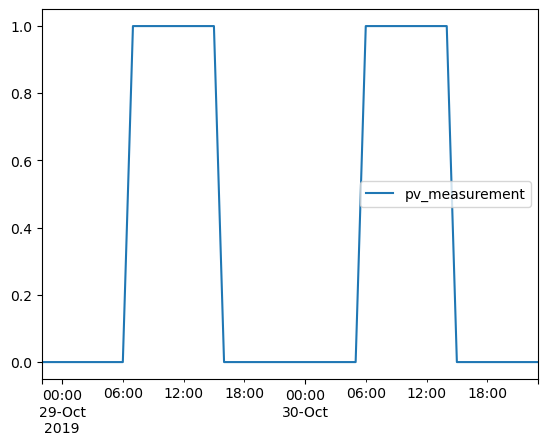

In [99]:
train_a_observed_binary.loc['2019-10-28 22:00:00':'2019-10-30 23:00:00'].plot()

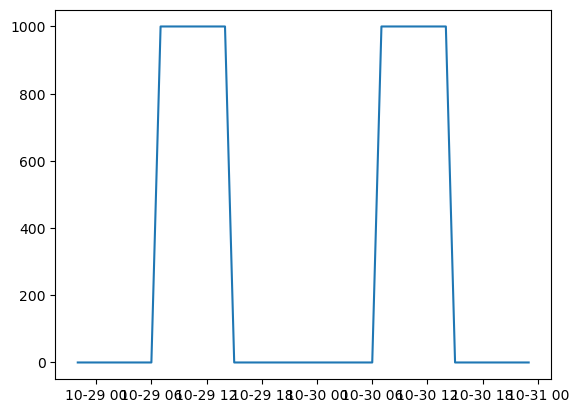

In [100]:
plt.plot(X_train_observed_a['is_day:idx'].loc['2019-10-28 22:00:00':'2019-10-30 23:00:00']*1000, label='Binary y')

# Prediction for each station

## Location A

In [101]:
def pos(x):
    if  x < 0:
        return 0
    else:
        return x

In [102]:
binary = lambda x, threshold: 0 if x < threshold else 1

In [103]:
X_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis=0)
y_a = pd.concat([train_a_observed, train_a_estimated], axis=0)

In [104]:
X_a = X_a.loc[A_index_spring]
y_a = y_a.loc[A_index_spring]

In [105]:
X_a.shape, y_a.shape

((4608, 83), (4608, 1))

<Axes: >

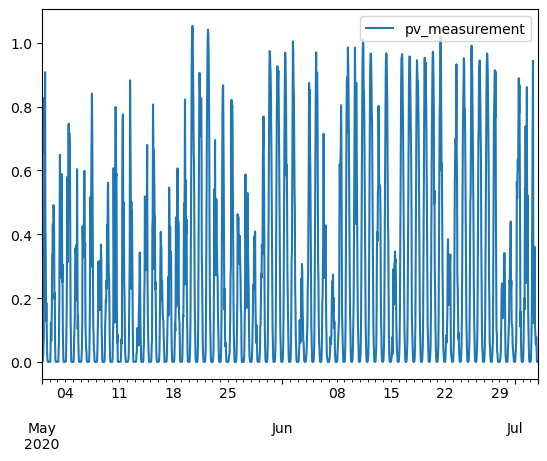

In [106]:
y_a.loc[A_index20].plot()

In [107]:
from xgboost import XGBClassifier

In [108]:
X_a_class = pd.concat([X_train_observed_a, X_train_estimated_a], axis=0)
y_a_class = pd.concat([train_a_observed_binary, train_a_estimated_binary], axis=0)

In [109]:
X_a_class.shape, y_a_class.shape

((34061, 83), (34061, 1))

In [110]:
model_classifier = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier.fit(X_a_class, y_a_class)
y_a_predict = model_classifier.predict(X_test_estimated_a)

In [111]:
df_pred_a = pd.DataFrame({'prediction' : y_a_predict}, index=X_test_estimated_a.index)

predict_indexes_a = df_pred_a[df_pred_a.prediction>.5].index
null_indexes_a = df_pred_a[df_pred_a.prediction<.5].index

<Axes: xlabel='date_forecast'>

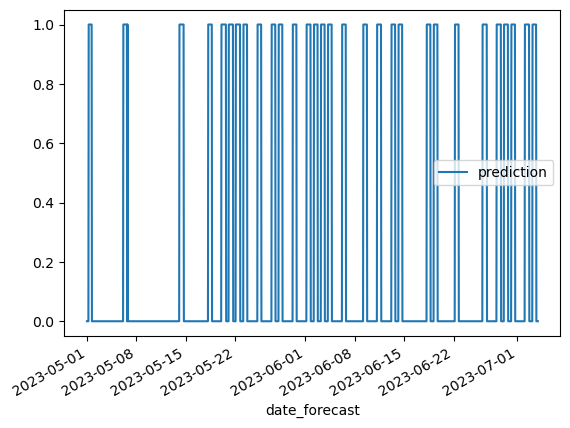

In [112]:
df_pred_a.plot()

In [115]:
import seaborn as sns

In [113]:
from xgboost import XGBRegressor
model_a = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_a.fit(X_a.loc[y_a[y_a.pv_measurement>0].index], y_a[y_a.pv_measurement>0])
y_pred_a = model_a.predict(X_test_estimated_a)


for date in predict_indexes_a : 
        df_pred_a.loc[date] = pd.DataFrame({'prediction' : y_pred_a * max_a}, index=X_test_estimated_a.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_a['prediction'] = df_pred_a['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2022')

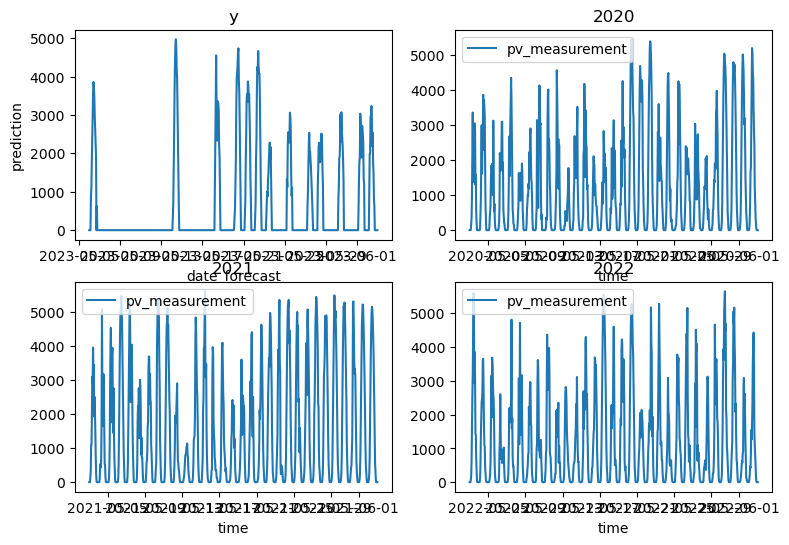

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_a['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_a['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_a['2022-05-03 00:00:00' : '2022-06-03 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

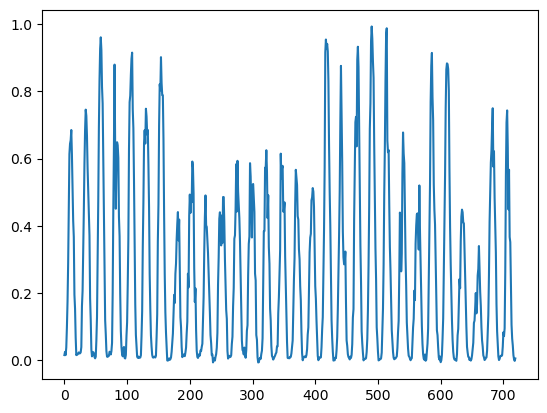

In [118]:
plt.plot(y_pred_a)

<Axes: xlabel='date_forecast'>

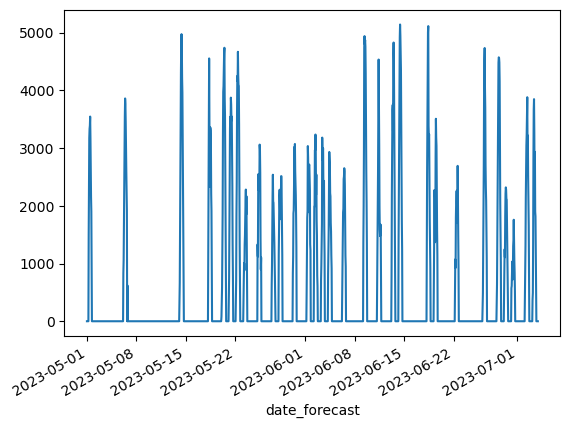

In [117]:
df_pred_a['prediction'].plot()

Text(0.5, 1.0, '2022')

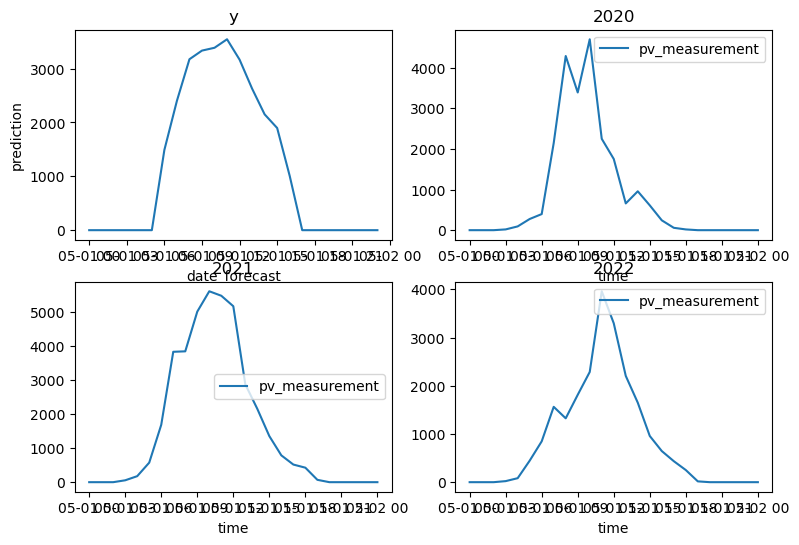

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_a['prediction']['2023-05-01 00:00:00' : '2023-05-02 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_a['2020-05-01 00:00:00' : '2020-05-02 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_a['2021-05-01 00:00:00' : '2021-05-02 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_a['2022-05-01 00:00:00' : '2022-05-02 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

In [120]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

id                time  prediction location
0      0 2023-05-01 00:00:00         0.0        A
1      1 2023-05-01 01:00:00         0.0        A
2      2 2023-05-01 02:00:00         0.0        A
3      3 2023-05-01 03:00:00         0.0        A
4      4 2023-05-01 04:00:00         0.0        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00         0.0        A
716  716 2023-07-03 20:00:00         0.0        A
717  717 2023-07-03 21:00:00         0.0        A
718  718 2023-07-03 22:00:00         0.0        A
719  719 2023-07-03 23:00:00         0.0        A

[720 rows x 4 columns]

## Location B

In [121]:
X_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis=0)
y_b = pd.concat([train_b_observed, train_b_estimated], axis=0)

In [122]:
X_b.shape, y_b.shape

((28909, 79), (28909, 1))

In [123]:
X_b = X_b.loc[B_index_spring]
y_b = y_b.loc[B_index_spring]

<Axes: >

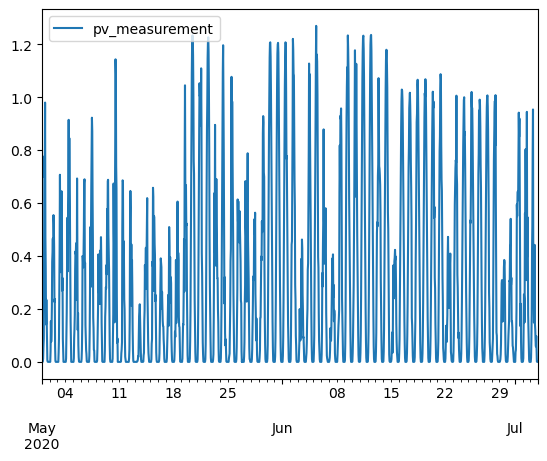

In [124]:
y_b.loc[B_index20].plot()

In [125]:
X_b_class = pd.concat([X_train_observed_b, X_train_estimated_b], axis=0)
y_b_class = pd.concat([train_b_observed_binary, train_b_estimated_binary], axis=0)

In [126]:
X_b_class.shape, y_b_class.shape

((28909, 79), (28909, 1))

In [127]:
model_classifier_b = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier_b.fit(X_b_class, y_b_class)
y_b_predict = model_classifier_b.predict(X_test_estimated_b)

In [128]:
df_pred_b = pd.DataFrame({'prediction' : y_b_predict}, index=X_test_estimated_b.index)

predict_indexes_b = df_pred_b[df_pred_b.prediction>.5].index
null_indexes_b = df_pred_b[df_pred_b.prediction<.5].index

<Axes: xlabel='date_forecast'>

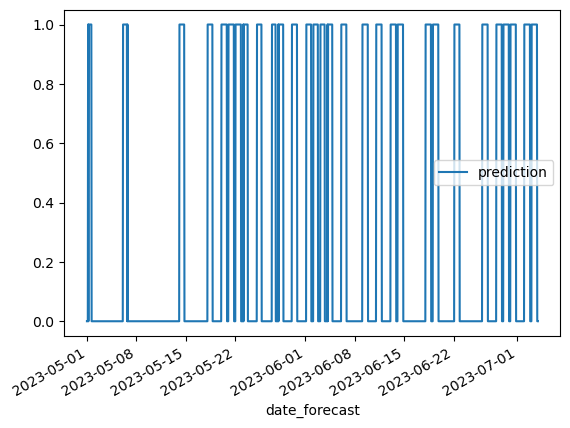

In [129]:
df_pred_b.plot()

In [130]:
from xgboost import XGBRegressor
model_b = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_b.fit(X_b.loc[y_b[y_b.pv_measurement>0].index], y_b[y_b.pv_measurement>0])
y_pred_b = model_b.predict(X_test_estimated_b)


for date in predict_indexes_b: 
        df_pred_b.loc[date] = pd.DataFrame({'prediction' : y_pred_b*max_b}, index=X_test_estimated_b.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_b['prediction'] = df_pred_b['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2021')

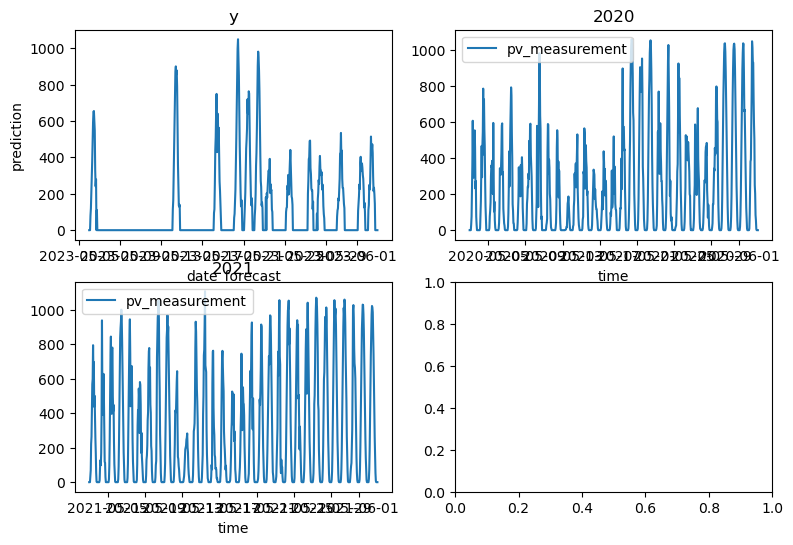

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_b['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0],)
axes[0].set_title("y")

sns.lineplot(data=train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_b['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")


In [132]:
df_pred_b

prediction
date_forecast                  
2023-05-01 00:00:00    0.000000
2023-05-01 01:00:00    0.000000
2023-05-01 02:00:00    0.000000
2023-05-01 03:00:00    0.000000
2023-05-01 04:00:00   74.030640
...                         ...
2023-07-03 19:00:00  166.771744
2023-07-03 20:00:00  166.104309
2023-07-03 21:00:00    0.000000
2023-07-03 22:00:00    0.000000
2023-07-03 23:00:00    0.000000

[720 rows x 1 columns]

<Axes: xlabel='date_forecast'>

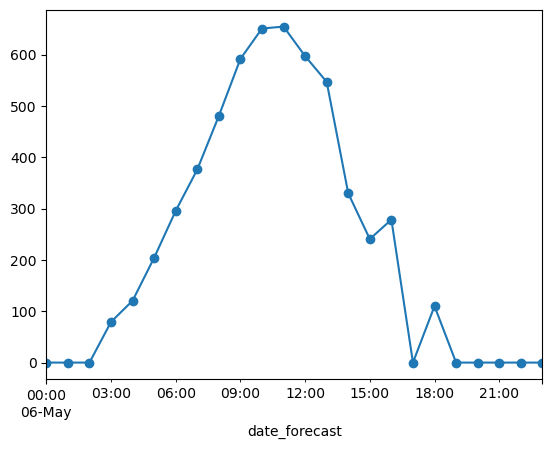

In [133]:
df_pred_b['prediction']['2023-05-06 00:00:00' : '2023-05-10 00:00:00'].plot(marker='o')

<Axes: xlabel='date_forecast'>

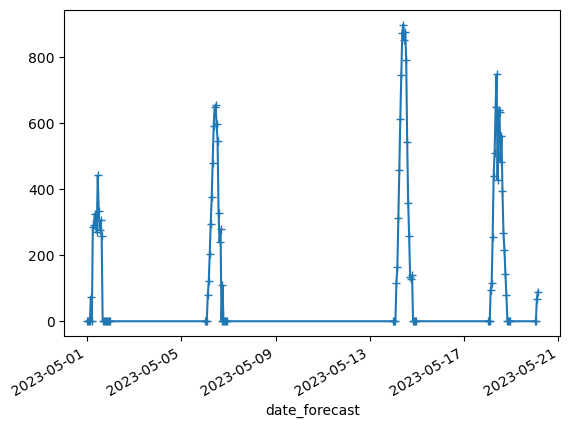

In [134]:
df_pred_b['prediction'][:100].plot(marker='+')

In [135]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        B
1      1 2023-05-01 01:00:00    0.000000        B
2      2 2023-05-01 02:00:00    0.000000        B
3      3 2023-05-01 03:00:00    0.000000        B
4      4 2023-05-01 04:00:00   74.030640        B
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00  166.771744        B
716  716 2023-07-03 20:00:00  166.104309        B
717  717 2023-07-03 21:00:00    0.000000        B
718  718 2023-07-03 22:00:00    0.000000        B
719  719 2023-07-03 23:00:00    0.000000        B

[720 rows x 4 columns]

<Axes: >

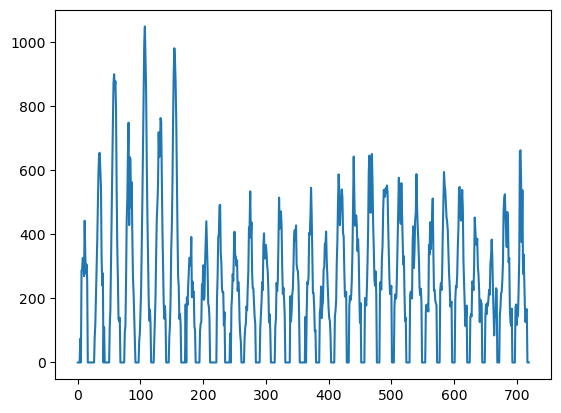

In [136]:
df_pred_b.prediction.plot()

## Location C

In [137]:
X_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis=0)
y_c = pd.concat([train_c_observed, train_c_estimated], axis=0)

In [138]:
X_c.shape, y_c.shape

((26071, 76), (26071, 1))

In [139]:
X_c = X_c.loc[C_index_spring]
y_c = y_c.loc[C_index_spring]

In [140]:
X_c_class = pd.concat([X_train_observed_c, X_train_estimated_c], axis=0)
y_c_class = pd.concat([train_c_observed_binary, train_c_estimated_binary], axis=0)

In [141]:
X_c_class.shape, y_c_class.shape

((26071, 76), (26071, 1))

In [142]:
model_classifier_c = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier_c.fit(X_c_class, y_c_class)
y_c_predict = model_classifier_c.predict(X_test_estimated_c)

In [143]:
df_pred_c = pd.DataFrame({'prediction' : y_c_predict}, index=X_test_estimated_c.index)

predict_indexes_c = df_pred_c[df_pred_c.prediction>.5].index
null_indexes_c = df_pred_c[df_pred_c.prediction<.5].index

<Axes: xlabel='date_forecast'>

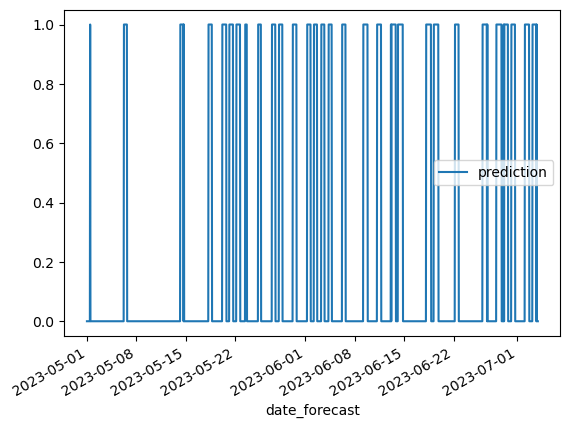

In [144]:
df_pred_c.plot()

In [145]:
model_c = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_c.fit(X_c.loc[y_c[y_c.pv_measurement>0].index], y_c[y_c.pv_measurement>0])
y_pred_c = model_c.predict(X_test_estimated_c)


for date in predict_indexes_c: 
        df_pred_c.loc[date] = pd.DataFrame({'prediction' : y_pred_c * max_c}, index=X_test_estimated_c.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_c['prediction'] = df_pred_c['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2022')

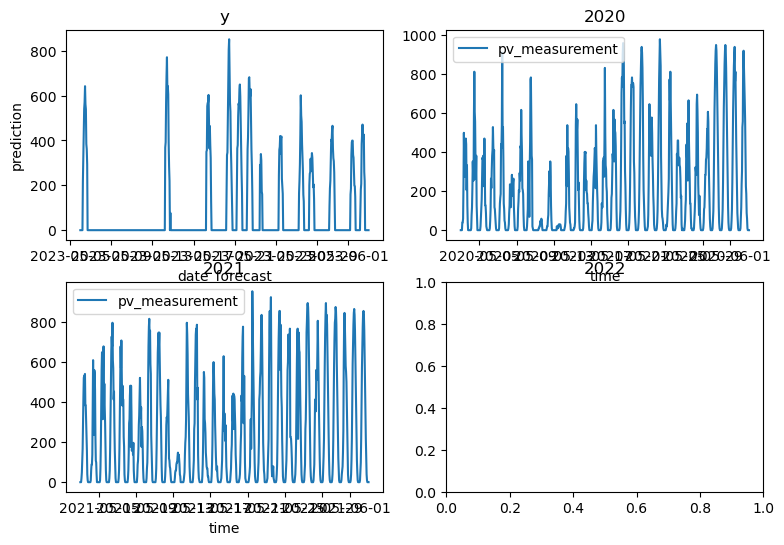

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_c['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_c['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_c['2022-05-03 00:00:00' : '2022-06-03 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

In [147]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        C
1      1 2023-05-01 01:00:00    0.000000        C
2      2 2023-05-01 02:00:00    0.000000        C
3      3 2023-05-01 03:00:00    0.000000        C
4      4 2023-05-01 04:00:00    0.000000        C
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   58.726612        C
716  716 2023-07-03 20:00:00    0.000000        C
717  717 2023-07-03 21:00:00    0.000000        C
718  718 2023-07-03 22:00:00    0.000000        C
719  719 2023-07-03 23:00:00    0.000000        C

[720 rows x 4 columns]

# Gather all the predictions

In [148]:
df_pred_a.head()

id                time  prediction location
0   0 2023-05-01 00:00:00         0.0        A
1   1 2023-05-01 01:00:00         0.0        A
2   2 2023-05-01 02:00:00         0.0        A
3   3 2023-05-01 03:00:00         0.0        A
4   4 2023-05-01 04:00:00         0.0        A

In [149]:
df_pred_b.head()

id                time  prediction location
0   0 2023-05-01 00:00:00     0.00000        B
1   1 2023-05-01 01:00:00     0.00000        B
2   2 2023-05-01 02:00:00     0.00000        B
3   3 2023-05-01 03:00:00     0.00000        B
4   4 2023-05-01 04:00:00    74.03064        B

In [150]:
df_pred_c.head()

id                time  prediction location
0   0 2023-05-01 00:00:00         0.0        C
1   1 2023-05-01 01:00:00         0.0        C
2   2 2023-05-01 02:00:00         0.0        C
3   3 2023-05-01 03:00:00         0.0        C
4   4 2023-05-01 04:00:00         0.0        C

In [151]:
def postprocessing(X_test_estimated, df_pred, threshold):
    set_ = X_test_estimated[X_test_estimated['sun_elevation:d']<threshold].index.tolist()
    for i in range(len(df_pred)):
        if pd.Timestamp(df_pred.iloc[i].time) in set_:
            df_pred.loc[i, 'prediction'] = 0
    return df_pred

<Axes: >

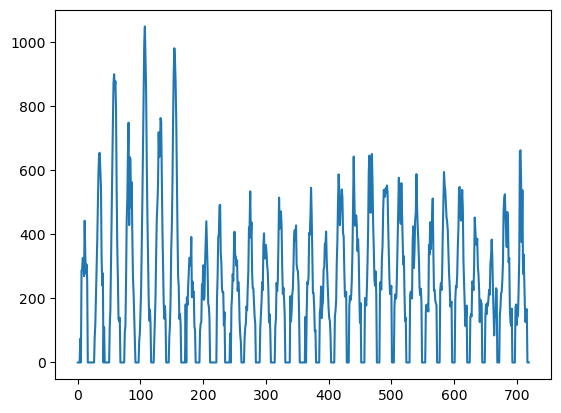

In [153]:
postprocessing(X_test_estimated_b, df_pred_b, 0).prediction.plot()

In [154]:
df_pred_a = postprocessing(X_test_estimated_a, df_pred_a, 0)
df_pred_b = postprocessing(X_test_estimated_b, df_pred_b, 0)
df_pred_c = postprocessing(X_test_estimated_c, df_pred_c, 0)

<Axes: >

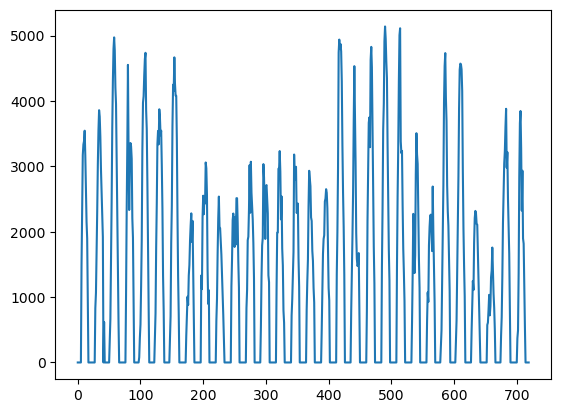

In [157]:
df_pred_a.prediction.plot()

In [155]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        A
1      1 2023-05-01 01:00:00    0.000000        A
2      2 2023-05-01 02:00:00    0.000000        A
3      3 2023-05-01 03:00:00    0.000000        A
4      4 2023-05-01 04:00:00    0.000000        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   58.726612        C
716  716 2023-07-03 20:00:00    0.000000        C
717  717 2023-07-03 21:00:00    0.000000        C
718  718 2023-07-03 22:00:00    0.000000        C
719  719 2023-07-03 23:00:00    0.000000        C

[2160 rows x 4 columns]

In [158]:
cd ../submission

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/submission


In [159]:
df_pred_final.to_csv('submission_43.csv', index=False)